In [16]:
%%capture
!pip install geopandas
!pip install mapclassify

In [17]:
import geopandas as gpd
from pyproj import CRS
import mapclassify
import matplotlib.pyplot as plt
%matplotlib inline

#Filepaths
county_fp = "Exercise 5/data/2018 County.shp"
censustracts_fp = "Exercise 5/data/Allegheny_County_Census_Tracts_2016.shp"
homeownership_fp = "Exercise 5/data/rates and values only.shp"

#Read files
county = gpd.read_file(county_fp)
censustracts = gpd.read_file(censustracts_fp)
homeownrate = gpd.read_file(homeownership_fp)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [18]:
# Check the crs of each layer
print(county.crs)
print(censustracts.crs)
print(homeownrate.crs)

epsg:4269
epsg:4269
epsg:4269


In [19]:
homeownrate.head(10)

,FID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,County O_7,County O_8,County O_9,County O10,County O11,OwnOcc2014,OwnOcc20_1,HomeValues,HV2018_Own,geometry
0,1,42,003,050900,1400000US42003050900,42003050900,509,CT,452643.0,4114.0,...,452643.0,4114.0,0.045048,0.000046,5.8,"Census Tract 509, Allegheny County, Pennsylvania",7.5,0,0,"POLYGON ((-79.98390 40.44852, -79.98094 40.449..."
1,3,42,003,120700,1400000US42003120700,42003120700,1207,CT,514927.0,0.0,...,514927.0,0.0,0.031372,0.000055,41.4,"Census Tract 1207, Allegheny County, Pennsylvania",48.9,51000,55700,"POLYGON ((-79.90955 40.45669, -79.90804 40.458..."
2,5,42,003,180700,1400000US42003180700,42003180700,1807,CT,393380.0,0.0,...,393380.0,0.0,0.026142,0.000042,43.2,"Census Tract 1807, Allegheny County, Pennsylvania",43.4,71300,87900,"POLYGON ((-80.00561 40.42701, -80.00384 40.427..."
3,25,42,003,552200,1400000US42003552200,42003552200,5522,CT,804397.0,235833.0,...,804397.0,235833.0,0.044993,0.000109,56.8,"Census Tract 5522, Allegheny County, Pennsylvania",57.0,39600,41600,"POLYGON ((-79.88561 40.34517, -79.88141 40.351..."
4,65,42,003,552300,1400000US42003552300,42003552300,5523,CT,830980.0,0.0,...,830980.0,0.0,0.047815,0.000086,56.4,"Census Tract 5523, Allegheny County, Pennsylvania",56.0,36900,34400,"POLYGON ((-79.85831 40.34105, -79.85737 40.342..."
5,71,42,003,030500,1400000US42003030500,42003030500,305,CT,668309.0,0.0,...,668309.0,0.0,0.046956,0.000072,22.9,"Census Tract 305, Allegheny County, Pennsylvania",25.3,94800,143600,"POLYGON ((-79.99182 40.44337, -79.99080 40.444..."
6,72,42,003,050600,1400000US42003050600,42003050600,506,CT,805419.0,6849.0,...,805419.0,6849.0,0.036499,0.000085,65.7,"Census Tract 506, Allegheny County, Pennsylvania",53.2,128500,89200,"POLYGON ((-79.96600 40.45519, -79.96042 40.456..."
7,80,42,003,552400,1400000US42003552400,42003552400,5524,CT,2044622.0,200574.0,...,2044622.0,200574.0,0.095117,0.000241,64.7,"Census Tract 5524, Allegheny County, Pennsylvania",70.4,51200,48600,"POLYGON ((-79.86133 40.34290, -79.85784 40.339..."
8,86,42,003,552000,1400000US42003552000,42003552000,5520,CT,639467.0,0.0,...,639467.0,0.0,0.038398,0.000066,62.9,"Census Tract 5520, Allegheny County, Pennsylvania",64.5,37200,33800,"POLYGON ((-79.84605 40.34216, -79.84599 40.342..."
9,95,42,003,190300,1400000US42003190300,42003190300,1903,CT,780870.0,0.0,...,780870.0,0.0,0.055764,0.000081,58.1,"Census Tract 1903, Allegheny County, Pennsylvania",55.9,122100,155600,"POLYGON ((-80.02062 40.42618, -80.01874 40.429..."


In [20]:
homeownrate.columns

Index(['FID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME',
       'LSAD', 'ALAND', 'AWATER', 'SHAPE_Leng', 'SHAPE_Area', 'OwnerOcc20',
       'County Own', 'County O_1', 'County O_2', 'County O_3', 'County O_4',
       'County O_5', 'County O_6', 'County O_7', 'County O_8', 'County O_9',
       'County O10', 'County O11', 'OwnOcc2014', 'OwnOcc20_1', 'HomeValues',
       'HV2018_Own', 'geometry'],
      dtype='object')

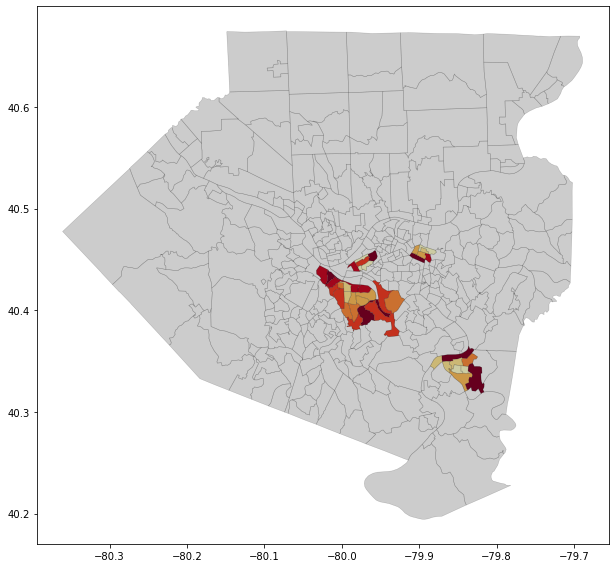

In [42]:
# Create one subplot. Control figure size in here.
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
homeownrate.plot(ax=ax, column="HomeValues", linewidth=0.03, cmap="YlOrRd", scheme="quantiles", k=7, alpha=1)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
county.plot(ax=ax, color="none", linewidth=0.5, alpha=0.2)

# Add metro on top of the previous map
censustracts.plot(ax=ax, color="black", linewidth=1.5, alpha=0.2)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)